In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [ ]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [ ]:
gwanpyung_gdf = gdf[gdf['ADM_CD']=='25040630']

In [ ]:
gwanpyung_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-5-703f95418f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwanpyung_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [ ]:
gwanpyung_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 61 entries, 10 to 371
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  61 non-null     object  
 1   ADM_CD     61 non-null     object  
 2   집계구번호      61 non-null     object  
 3   geometry   61 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 2.4+ KB


In [ ]:
gwanpyung_gdf['집계구번호'] = gwanpyung_gdf['집계구번호'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gwanpyung_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/관평동_인구수.xls')
gwanpyung_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,관평동_1,2.504063e+13,809.0,2.9
1,2.0,관평동_2,2.504063e+13,722.0,2.6
2,3.0,관평동_3,2.504063e+13,602.0,2.2
3,4.0,관평동_4,2.504063e+13,602.0,2.2
4,5.0,관평동_5,2.504063e+13,590.0,2.1
...,...,...,...,...,...
56,57.0,관평동_57,2.504063e+13,280.0,1.0
57,58.0,관평동_58,2.504063e+13,98.0,0.4
58,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
gwanpyung_df['집계구번호'].fillna(0, inplace=True)
gwanpyung_df['집계구번호'] = gwanpyung_df['집계구번호'].astype(int)
gwanpyung_df

,순위,항목,집계구번호,값,비율(%)
0,1.00000,관평동_1,25040630010002,809.00000,2.90000
1,2.00000,관평동_2,25040630060001,722.00000,2.60000
2,3.00000,관평동_3,25040630070103,602.00000,2.20000
3,4.00000,관평동_4,25040630080103,602.00000,2.20000
4,5.00000,관평동_5,25040630030301,590.00000,2.10000
...,...,...,...,...,...
56,57.00000,관평동_57,25040630050001,280.00000,1.00000
57,58.00000,관평동_58,25040630040001,98.00000,0.40000
58,NaN,NaN,0,NaN,NaN
59,NaN,NaN,0,NaN,NaN


In [ ]:
gwanpyung_df = gwanpyung_df[:-3]
gwanpyung_df

,순위,항목,집계구번호,값,비율(%)
0,1.00000,관평동_1,25040630010002,809.00000,2.90000
1,2.00000,관평동_2,25040630060001,722.00000,2.60000
2,3.00000,관평동_3,25040630070103,602.00000,2.20000
3,4.00000,관평동_4,25040630080103,602.00000,2.20000
4,5.00000,관평동_5,25040630030301,590.00000,2.10000
5,6.00000,관평동_6,25040630040101,588.00000,2.10000
6,7.00000,관평동_7,25040630080402,575.00000,2.10000
7,8.00000,관평동_8,25040630040203,561.00000,2.00000
8,9.00000,관평동_9,25040630070102,558.00000,2.00000
9,10.00000,관평동_10,25040630040104,553.00000,2.00000


In [ ]:
gwanpyung_df = gwanpyung_df.sort_values('집계구번호')
gwanpyung_df

,순위,항목,집계구번호,값,비율(%)
34,35.00000,관평동_35,25040630010001,449.00000,1.60000
0,1.00000,관평동_1,25040630010002,809.00000,2.90000
30,31.00000,관평동_31,25040630020001,461.00000,1.70000
16,17.00000,관평동_17,25040630030101,518.00000,1.90000
17,18.00000,관평동_18,25040630030102,518.00000,1.90000
27,28.00000,관평동_28,25040630030103,470.00000,1.70000
33,34.00000,관평동_34,25040630030201,450.00000,1.60000
39,40.00000,관평동_40,25040630030202,424.00000,1.50000
28,29.00000,관평동_29,25040630030203,469.00000,1.70000
4,5.00000,관평동_5,25040630030301,590.00000,2.10000


In [ ]:
gwanpyung_gdf = gwanpyung_gdf.sort_values('집계구번호')
gwanpyung_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
309,20230701,25040630,25040630010001,"POLYGON ((127.39090 36.42753, 127.39085 36.427..."
312,20230701,25040630,25040630010002,"POLYGON ((127.39047 36.42687, 127.39038 36.426..."
314,20230701,25040630,25040630020001,"POLYGON ((127.38909 36.42475, 127.38907 36.424..."
315,20230701,25040630,25040630030001,"POLYGON ((127.38877 36.42426, 127.38866 36.424..."
318,20230701,25040630,25040630030101,"POLYGON ((127.38723 36.42500, 127.38700 36.424..."
...,...,...,...,...
365,20230701,25040630,25040630080303,"POLYGON ((127.38365 36.42170, 127.38425 36.421..."
366,20230701,25040630,25040630080304,"POLYGON ((127.38241 36.42194, 127.38290 36.421..."
369,20230701,25040630,25040630080401,"POLYGON ((127.38644 36.42066, 127.38643 36.420..."
370,20230701,25040630,25040630080402,"POLYGON ((127.38590 36.42088, 127.38587 36.420..."


In [ ]:
gwanpyung_gdf['집계구번호'].info()

<class 'pandas.core.series.Series'>
Index: 61 entries, 309 to 371
Series name: 집계구번호
Non-Null Count  Dtype
--------------  -----
61 non-null     int64
dtypes: int64(1)
memory usage: 3.0 KB


In [ ]:
# '집계구번호' 열을 기준으로 병합
gwanpyung_new_gdf = gwanpyung_gdf.merge(gwanpyung_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
gwanpyung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040630,25040630010001,"POLYGON ((127.39090 36.42753, 127.39085 36.427...",449.00000,1.60000
1,20230701,25040630,25040630010002,"POLYGON ((127.39047 36.42687, 127.39038 36.426...",809.00000,2.90000
2,20230701,25040630,25040630020001,"POLYGON ((127.38909 36.42475, 127.38907 36.424...",461.00000,1.70000
3,20230701,25040630,25040630030001,"POLYGON ((127.38877 36.42426, 127.38866 36.424...",NaN,NaN
4,20230701,25040630,25040630030101,"POLYGON ((127.38723 36.42500, 127.38700 36.424...",518.00000,1.90000
...,...,...,...,...,...,...
56,20230701,25040630,25040630080303,"POLYGON ((127.38365 36.42170, 127.38425 36.421...",451.00000,1.60000
57,20230701,25040630,25040630080304,"POLYGON ((127.38241 36.42194, 127.38290 36.421...",444.00000,1.60000
58,20230701,25040630,25040630080401,"POLYGON ((127.38644 36.42066, 127.38643 36.420...",485.00000,1.80000
59,20230701,25040630,25040630080402,"POLYGON ((127.38590 36.42088, 127.38587 36.420...",575.00000,2.10000


In [ ]:
gwanpyung_new_gdf['일별쓰레기배출량'] = gwanpyung_new_gdf['값'] * 0.93
gwanpyung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040630,25040630010001,"POLYGON ((127.39090 36.42753, 127.39085 36.427...",449.00000,1.60000,417.57000
1,20230701,25040630,25040630010002,"POLYGON ((127.39047 36.42687, 127.39038 36.426...",809.00000,2.90000,752.37000
2,20230701,25040630,25040630020001,"POLYGON ((127.38909 36.42475, 127.38907 36.424...",461.00000,1.70000,428.73000
3,20230701,25040630,25040630030001,"POLYGON ((127.38877 36.42426, 127.38866 36.424...",NaN,NaN,NaN
4,20230701,25040630,25040630030101,"POLYGON ((127.38723 36.42500, 127.38700 36.424...",518.00000,1.90000,481.74000
...,...,...,...,...,...,...,...
56,20230701,25040630,25040630080303,"POLYGON ((127.38365 36.42170, 127.38425 36.421...",451.00000,1.60000,419.43000
57,20230701,25040630,25040630080304,"POLYGON ((127.38241 36.42194, 127.38290 36.421...",444.00000,1.60000,412.92000
58,20230701,25040630,25040630080401,"POLYGON ((127.38644 36.42066, 127.38643 36.420...",485.00000,1.80000,451.05000
59,20230701,25040630,25040630080402,"POLYGON ((127.38590 36.42088, 127.38587 36.420...",575.00000,2.10000,534.75000


In [ ]:
gwanpyung_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
gwanpyung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040630,25040630010001,"POLYGON ((127.39090 36.42753, 127.39085 36.427...",449.00000,1.60000,417.57000
1,20230701,25040630,25040630010002,"POLYGON ((127.39047 36.42687, 127.39038 36.426...",809.00000,2.90000,752.37000
2,20230701,25040630,25040630020001,"POLYGON ((127.38909 36.42475, 127.38907 36.424...",461.00000,1.70000,428.73000
3,20230701,25040630,25040630030001,"POLYGON ((127.38877 36.42426, 127.38866 36.424...",NaN,NaN,0.00000
4,20230701,25040630,25040630030101,"POLYGON ((127.38723 36.42500, 127.38700 36.424...",518.00000,1.90000,481.74000
...,...,...,...,...,...,...,...
56,20230701,25040630,25040630080303,"POLYGON ((127.38365 36.42170, 127.38425 36.421...",451.00000,1.60000,419.43000
57,20230701,25040630,25040630080304,"POLYGON ((127.38241 36.42194, 127.38290 36.421...",444.00000,1.60000,412.92000
58,20230701,25040630,25040630080401,"POLYGON ((127.38644 36.42066, 127.38643 36.420...",485.00000,1.80000,451.05000
59,20230701,25040630,25040630080402,"POLYGON ((127.38590 36.42088, 127.38587 36.420...",575.00000,2.10000,534.75000


In [ ]:
# 문자열 리스트 생성
code_list = [
    "60001", "60101", "60301", "60201", "60401",
    "50103", "50101", "50102", "50201", "50202",
    "50001"
]

new_codes = []
for code in code_list:
  new_code = int("250406300" + code)
  new_codes.append(new_code)

print(new_codes)

[25040630060001, 25040630060101, 25040630060301, 25040630060201, 25040630060401, 25040630050103, 25040630050101, 25040630050102, 25040630050201, 25040630050202, 25040630050001]


In [ ]:
gwanpyung_filter_gdf = gwanpyung_new_gdf[~gwanpyung_new_gdf['집계구번호'].isin(new_codes)]
gwanpyung_filter_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040630,25040630010001,"POLYGON ((127.39090 36.42753, 127.39085 36.427...",449.00000,1.60000,417.57000
1,20230701,25040630,25040630010002,"POLYGON ((127.39047 36.42687, 127.39038 36.426...",809.00000,2.90000,752.37000
2,20230701,25040630,25040630020001,"POLYGON ((127.38909 36.42475, 127.38907 36.424...",461.00000,1.70000,428.73000
3,20230701,25040630,25040630030001,"POLYGON ((127.38877 36.42426, 127.38866 36.424...",NaN,NaN,0.00000
4,20230701,25040630,25040630030101,"POLYGON ((127.38723 36.42500, 127.38700 36.424...",518.00000,1.90000,481.74000
5,20230701,25040630,25040630030102,"POLYGON ((127.38700 36.42463, 127.38684 36.424...",518.00000,1.90000,481.74000
6,20230701,25040630,25040630030103,"POLYGON ((127.38646 36.42454, 127.38684 36.424...",470.00000,1.70000,437.10000
7,20230701,25040630,25040630030201,"POLYGON ((127.38634 36.42387, 127.38605 36.423...",450.00000,1.60000,418.50000
8,20230701,25040630,25040630030202,"POLYGON ((127.38560 36.42273, 127.38538 36.422...",424.00000,1.50000,394.32000
9,20230701,25040630,25040630030203,"POLYGON ((127.38488 36.42391, 127.38468 36.423...",469.00000,1.70000,436.17000


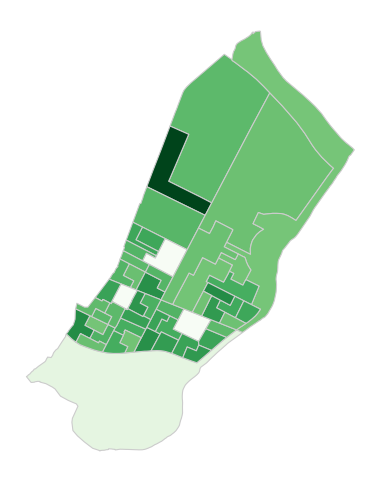

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = gwanpyung_filter_gdf[variable].min(), gwanpyung_filter_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
gwanpyung_filter_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/gwanpyung_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [ ]:
# CSV 파일 경로
file_path_ = '/content/drive/MyDrive/유성구 데이터/유성구_공동주택_현황_위경도.csv'

# CSV 파일 읽기
apart_df = pd.read_csv(file_path_)

# 데이터프레임 확인
apart_df

,NAME,ADDRESS,_X,_Y
0,원자력연료사원아파트,대전광역시 유성구 도룡동 392-2,127.37591,36.38413
1,우성아파트,대전광역시 유성구 도룡동 383-3,127.38112,36.38818
2,연구원 현대아파트,대전광역시 유성구 도룡동 431-6,127.37672,36.38301
3,과기원교수아파트,대전광역시 유성구 도룡동 383-2,127.38033,36.38810
4,삼정하이츠아파트,대전광역시 유성구 구암동 600-2,127.33172,36.35342
...,...,...,...,...
244,호반써밋유성그랜드파크1단지,대전광역시 유성구 용산동 371-4,127.39104,36.41698
245,호반써밋유성그랜드파크3단지,대전광역시 유성구 용산동 391-2,127.39564,36.41369
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.35198,36.35838
247,크레타하임,대전광역시 유성구 도룡동 385-21,127.37968,36.38581


In [ ]:
# 'ADDRESS' 열에 '관평동'이 포함된 행만 필터링
gwanpyung_apart_df = apart_df[apart_df['ADDRESS'].str.contains('관평동')]

# 필터링된 데이터프레임을 새로운 변수에 저장
gwanpyung_apart_df

,NAME,ADDRESS,_X,_Y
85,대덕테크노밸리 4단지,대전광역시 유성구 관평동 666,127.38445,36.41941
86,대덕테크노밸리 1단지,대전광역시 유성구 관평동 664,127.38318,36.42152
89,대덕테크노밸리 2단지,대전광역시 유성구 관평동 665,127.38227,36.41994
90,대덕테크노밸리 3단지,대전광역시 유성구 관평동 668,127.38564,36.42123
91,대덕테크노밸리 5단지,대전광역시 유성구 관평동 669,127.38751,36.42063
92,대덕테크노밸리 6단지,대전광역시 유성구 관평동 672,127.39068,36.41941
104,대덕테크노밸리 7단지,대전광역시 유성구 관평동 892,127.38596,36.42503
105,대덕테크노밸리 8단지,대전광역시 유성구 관평동 896,127.38501,36.42347
111,대덕테크노밸리 9단지,대전광역시 유성구 관평동 898,127.38668,36.42283
114,대덕테크노밸리 10단지,대전광역시 유성구 관평동 1280,127.39119,36.42209


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=gwanpyung_filter_gdf.to_json(),
    data=gwanpyung_filter_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

for _, row in gwanpyung_apart_df.iterrows():
    folium.Circle(
        location=[row['_Y'], row['_X']],
        radius=100,  # 반경 설정 (미터 단위)
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"주소: {row['ADDRESS']}"  # 마커에 표시될 툴팁
    ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/gwanpyung_block1.html')
m